<a href="https://colab.research.google.com/github/irahanjose/Aprendizaje-de-M-quina-con-Python/blob/main/primera_red_neuronal_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- El problema a resolver

Los físicos usan aceleradores de partículas, como el [Gran Colisionador de Hadrones](https://es.wikipedia.org/wiki/Gran_colisionador_de_hadrones) ubicado en la frontera entre Suiza y Francia, para descubrir nuevas partículas subatómicas.

La detección de estas partículas usualmente es un problema de clasificación, para determinar si el dato observado corresponde a la señal de interés o al ruido de fondo.

La idea es desarrollar un modelo de Deep Learning capaz de realizar esta clasificación.

# 2- El set de datos

El set de datos fue desarrollado por investigadores del Departamento de Física y Astronomía de la Universidad de California Irvine.

En total contiene 11 millones de datos, cada uno representado por 28 características (*features*):

- Las primeras 21 corresponden a propiedades cinemáticas medidas por los detectores de partículas en el acelerador.
- Las 7 características restantes son calculadas a partir de las 21 anteriores, y fueron derivadas por los físicos para facilitar el proceso de clasificación.

Cada dato está etiquetado en una de dos posibles características:

- "1": presencia de señal (posiblemente una partícula)
- "0": ruido de fondo (no corresponde a una partícula)

Para más información se sugiere mirar los detalles en el artículo [Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://arxiv.org/pdf/1402.4735.pdf).

Teniendo en cuenta el elevado número de datos que contiene este set, para esta práctica se trabajará con una versión reducida del mismo (*HIGGS_subset.csv*) que contiene un total de 100.000 datos.

## 2.1- Preparación de Google Drive y lectura del set de datos

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd

ruta = '/gdrive/MyDrive/Colab Notebooks/01_2021-07-FundamentosDL/1.16/HIGGS_subset.csv'
df = pd.read_csv(ruta)
print(df.shape)
df.head()

(100000, 29)


,1.00E+00,8.69E-01,-6.35E-01,2.26E-01,3.27E-01,-6.90E-01,7.54E-01,-2.49E-01,-1.09E+00,0.00E+00,1.37E+00,-6.54E-01,9.30E-01,1.11E+00,1.14E+00,-1.58E+00,-1.05E+00,0.000000000000000000e+00.1,6.58E-01,-1.05E-02,-4.58E-02,3.10E+00,1.35E+00,9.80E-01,9.78E-01,9.20E-01,7.22E-01,9.89E-01,8.77E-01
0,0,0.320083,-0.258156,-0.748752,0.934500,-0.007166,0.358276,-1.813136,-0.723959,0.000000,0.648403,-0.555565,0.531426,2.214872,0.705822,0.090288,1.634711,2.548224,0.620932,-0.505984,-1.425281,0.000000,0.823101,0.814655,0.988860,0.795775,0.650955,0.718191,0.642627
1,1,1.015883,-0.520153,-0.281001,0.624704,-0.784161,0.872192,-1.489331,1.576804,0.000000,0.922747,-0.560422,1.431915,2.214872,0.843158,0.324221,0.292806,2.548224,0.526976,1.254604,-0.800450,0.000000,0.367025,1.140837,0.986885,0.659926,0.921141,0.750046,0.719383
2,0,0.341129,-2.031753,0.731169,1.457364,-0.898847,0.175428,-1.724016,-1.037181,0.000000,0.459422,1.315300,1.709330,0.000000,0.450820,-2.184424,1.415590,0.000000,1.662958,0.224402,0.227907,3.101961,1.097289,0.871776,0.987942,0.869959,0.626679,1.114897,1.149453
3,0,0.812743,-1.324652,1.291579,0.468025,-0.063256,1.467181,-1.758674,-1.740129,0.000000,2.255309,-0.860577,0.566936,2.214872,1.734612,-0.606963,-0.574351,0.000000,2.493950,-0.030442,-1.218299,0.000000,0.883288,0.787425,0.986954,0.869872,0.562826,0.919145,0.789303
4,1,0.342410,1.051832,-1.309716,2.484316,-0.511491,0.704459,0.134646,1.313476,2.173076,1.013775,-1.558023,0.942001,0.000000,0.557071,0.696513,0.682230,0.000000,1.008679,-0.849108,-1.172796,1.550981,1.728419,1.202410,0.985475,1.203403,0.886029,0.903616,1.090524


In [ ]:
# Distribución de categorías
df.iloc[:,0].value_counts()

1    52892
0    47108
Name: 1.00E+00, dtype: int64

## 2.2- Creación del set de entrenamiento

In [ ]:
X = df.values[:,1:]
Y = df.values[:,0]
print(X.shape)
print(Y.shape)

(100000, 28)
(100000,)


# 3- Creación y entrenamiento del modelo

- Capa de entrada: 28 elementos
- Capa de salida: 1 elemento (neurona de salida con activación sigmoidal)

Cuando no se tiene un referente previo se sugiere crear un primer modelo lo más simple posible. Crearemos un modelo con **una** capa oculta y el número de neuronas el promedio de las capas de entrada y de salida:

$n_{neuronas} = \frac{28+1}{2} = 15$

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

DIM_ENTRADA = X.shape[1]   # 28
DIM_SALIDA = 1

modelo = Sequential()
modelo.add(Dense(15, activation='relu', input_shape=(DIM_ENTRADA,)))
modelo.add(Dense(DIM_SALIDA, activation='sigmoid'))

modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                435       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


Verifiquemos el número de parámetros:

$ \text{Entrada a capa oculta: } 28x15 + 15 = 435$
$ \text{Capa oculta a salida: } 15x1 + 1 = 16$

In [ ]:
# Compilación y entrenamiento
from tensorflow.keras.optimizers import Adam

EPOCHS = 1000
TAM_LOTE = 10000

opt = Adam()
modelo.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

historia = modelo.fit(X, Y, epochs=EPOCHS, batch_size = TAM_LOTE, verbose=1)

# 4 - Resultados

In [ ]:
import matplotlib.pyplot as plt

def graficar(historia):
  plt.figure(figsize=(15,5))

  loss = historia.history['loss']
  accuracy = historia.history['accuracy']
  epochs = historia.epoch

  plt.subplot(121)
  plt.plot(epochs,loss,label='train_loss')
  plt.legend()

  plt.subplot(122)
  plt.plot(epochs,accuracy,label='train_acc')
  plt.legend()

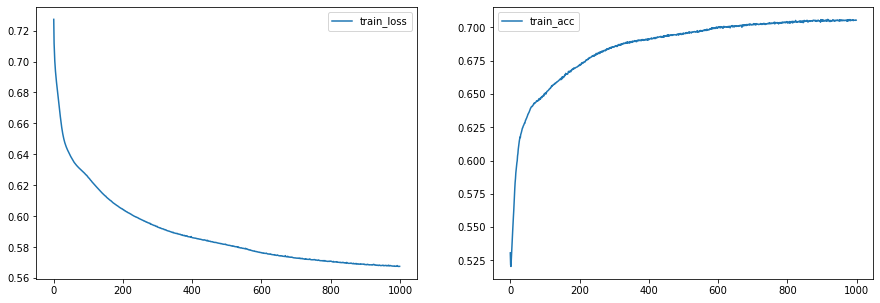

In [ ]:
graficar(historia)

#5 - Sugerencias adicionales


Se pueden afinar diferentes hiperparámetros para intentar mejorar la precisión del modelo:

1. Cambiando el *número de neuronas* de la capa oculta
2. Agregando más capas y cambiando el número de neuronas de cada capa
3. Incrementando el *número de epochs*
4. Cambiando el *batch_size*
5. Modificando el *learning_rate* del optimizador (que por defecto está en 0.001)

#6 - Conclusión

Independientemente de los resultados que se obtengan, queda una pregunta de fondo por responder:

1. ¿Cómo saber si el modelo entrenado funcionará bien con nuevos datos?
2. ¿Cómo poder contar con una estrategia más confiable para estimar adecuadamente los hiperparámetros del modelo?